# Title: Fluctuating Crop Yields and Food Security in ASEAN: Implications for Responsible Consumption and Sustainable Agricultural Practices
Note: The dataset includes crop yield data for major crops (paddy, cassava, maize, soybean, and sugarcane) in ASEAN countries from 2013 to 2022. While the data does not directly specify all regions, it offers valuable insights into the trends affecting food security across ASEAN nations.

### SDG’s: (2 & 12) Zero Hunger & Responsible Consumption and Production

### Statement of the Problem:
How do fluctuations in crop yields (paddy, cassava, maize, soybean, and sugarcane) across ASEAN countries from 2013 to 2022 impact food security? In particular, how can these changes in crop production be linked to responsible consumption and sustainable agricultural practices to achieve Zero Hunger and promote more responsible consumption?

### Definition of Terms:
- Year (2013–2022) - The time span covered by the crop production data.

- Location - ASEAN countries, where the agricultural data is recorded.

- Crop Yield (Metric Tons) - The total production of each crop (paddy, cassava, maize, soybean, sugarcane).

- Responsible Consumption - The practice of consuming food resources efficiently and sustainably, minimizing waste.

### Objectives:
- To analyze the trend of crop yields (paddy, cassava, maize, soybean, sugarcane) across ASEAN countries from 2013 to 2022.

- To investigate the relationship between crop yield fluctuations and food security in the ASEAN region, identifying regions most vulnerable to food shortages.

- To explore how changes in crop yields are linked to responsible consumption, examining whether reduced yields lead to food waste or shifts in consumption behavior.

- To evaluate the role of sustainable agricultural practices in stabilizing crop yields and promoting food security in the face of climate change.

- To recommend strategies for responsible consumption and agricultural reforms that can ensure food security and support the achievement of SDG 2 (Zero Hunger) and SDG 12 (Responsible Consumption and Production).

# Extracting the data

In [3]:
#I first need to combine all the csv files that we're going to use

import pandas as pd

# List of tuples: (filename, crop_name)
files_and_crops = [
    ('Maize Production.csv', 'maize'),
    ('Cassava Production.csv', 'cassava'),
    ('Paddy Production (1).csv', 'paddy'),
    ('Soybean Production.csv', 'soybean'),
    ('Sugarcane Production.csv', 'sugarcane')
]

dataframes = []

# Loop through each file and assign the crop name
for filename, crop in files_and_crops:
    df = pd.read_csv(filename)
    df['Crop'] = crop  # Add crop name as a new column
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a new CSV 
combined_df.to_csv('ASEAN_crop_data.csv', index=False)

In [4]:
combined_df.head(3)

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Crop
0,Brunei Darussalam,-,-,-,-,-,-,0.3,0.5,0.5,-,maize
1,Cambodia,843,926.9,549.4,560.6,662.8,"1,303.80",985.1,821.8,791.5,792.5,maize
2,Indonesia,"18,509.00","19,008.40","19,833.30","23,578.40","28,924.00","21,655.20","23,951.00","23,172.10","23,342.40","23,383.10",maize


In [5]:
import pandas as pd

# Melt crop_df convert years to a 'Year' column
crop_long = pd.melt(combined_df,
                    id_vars=['Country', 'Crop'],
                    var_name='Year',
                    value_name='Yield')

# load the population dataset
population_df = pd.read_csv('No. of population.csv')

# also Melt  population_df convert years to a 'Year' column
population_long = pd.melt(population_df,
                          id_vars=['Country'],
                          var_name='Year',
                          value_name='Population')

# Merge the two DataFrames on Country and Year
merged_df = pd.merge(crop_long, population_long, on=['Country', 'Year'], how='left')

#Save to a new CSV
merged_df.to_csv('ASEAN_crop_with_population.csv', index=False)

In [6]:
merged_df.head(3)

,Country,Crop,Year,Yield,Population
0,Brunei Darussalam,maize,2013,-,406.2
1,Cambodia,maize,2013,843,"14,676.60"
2,Indonesia,maize,2013,"18,509.00","248,818.10"


# Transforming

Let's check the data's dtypes

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     550 non-null    object
 1   Crop        550 non-null    object
 2   Year        550 non-null    object
 3   Yield       550 non-null    object
 4   Population  500 non-null    object
dtypes: object(5)
memory usage: 21.6+ KB


In [8]:
# Convert Year to datetime, and Production & Population to numeric
merged_df['Year'] = pd.to_datetime(merged_df['Year'], errors='coerce').dt.year
merged_df['Yield'] = pd.to_numeric(merged_df['Yield'].astype(str).str.replace(',', ''), errors='coerce')
merged_df['Population'] = pd.to_numeric(merged_df['Population'].astype(str).str.replace(',', ''), errors='coerce')

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     550 non-null    object 
 1   Crop        550 non-null    object 
 2   Year        550 non-null    int32  
 3   Yield       459 non-null    float64
 4   Population  500 non-null    float64
dtypes: float64(2), int32(1), object(2)
memory usage: 19.5+ KB


In [10]:
merged_df.isna().any()

Country       False
Crop          False
Year          False
Yield          True
Population     True
dtype: bool

In [11]:
merged_df = merged_df.replace('-', pd.NA)

In [12]:
merged_df.duplicated().sum()

0

In [13]:
merged_df.head()

,Country,Crop,Year,Yield,Population
0,Brunei Darussalam,maize,2013,NaN,406.2
1,Cambodia,maize,2013,843.0,14676.6
2,Indonesia,maize,2013,18509.0,248818.1
3,Lao PDR,maize,2013,1214.1,6644.0
4,Malaysia,maize,2013,86.5,NaN


# Loading the data

In [14]:
# Make sure 'Yield' is numeric
merged_df['Yield'] = pd.to_numeric(merged_df['Yield'], errors='coerce')

# Remove regional totals like "ASEAN" if needed
merged_df = merged_df[merged_df['Country'] != 'ASEAN']

# Sort by Country, Crop, and Year
merged_df = merged_df.sort_values(by=['Country', 'Crop', 'Year'])

# Calculate year-over-year growth rate
merged_df['Yield_Growth_%'] = merged_df.groupby(['Country', 'Crop'])['Yield'].pct_change() * 100

# Round for readability
merged_df['Yield_Growth_%'] = merged_df['Yield_Growth_%'].round(2)

# Preview the results
merged_df[['Country', 'Crop', 'Year', 'Yield', 'Yield_Growth_%']].head(10)

C:\Users\jnrss\AppData\Local\Temp\ipykernel_29140\1266112889.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['Yield_Growth_%'] = merged_df.groupby(['Country', 'Crop'])['Yield'].pct_change() * 100


,Country,Crop,Year,Yield,Yield_Growth_%
11,Brunei Darussalam,cassava,2013,3.0,NaN
66,Brunei Darussalam,cassava,2014,3.0,0.00
121,Brunei Darussalam,cassava,2015,3.2,6.67
176,Brunei Darussalam,cassava,2016,3.2,0.00
231,Brunei Darussalam,cassava,2017,3.3,3.12
286,Brunei Darussalam,cassava,2018,3.3,0.00
341,Brunei Darussalam,cassava,2019,0.3,-90.91
396,Brunei Darussalam,cassava,2020,0.3,0.00
451,Brunei Darussalam,cassava,2021,0.3,0.00
506,Brunei Darussalam,cassava,2022,0.4,33.33


### Trend of Crop Yields Across ASEAN Countries (2013-2022)

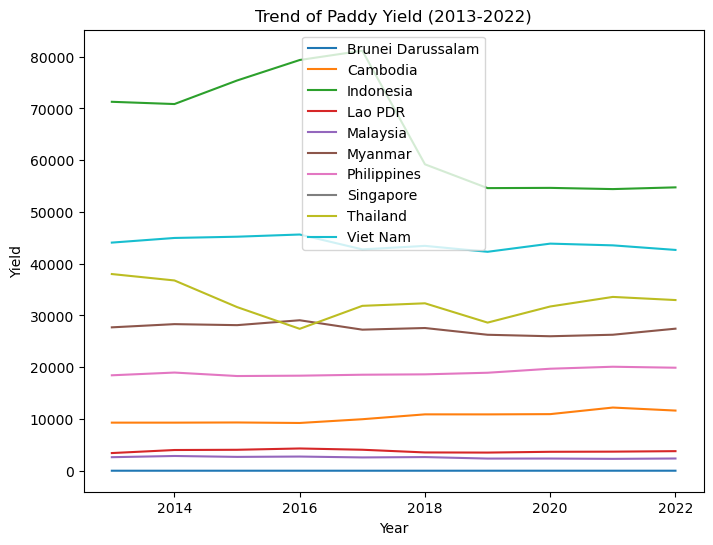

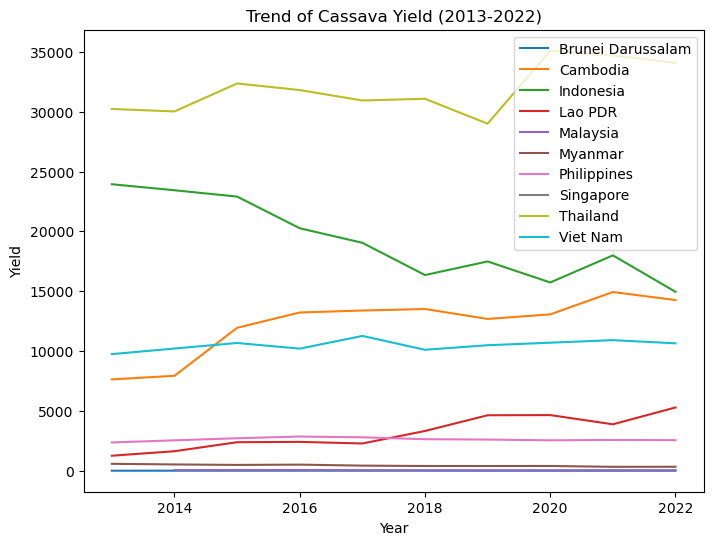

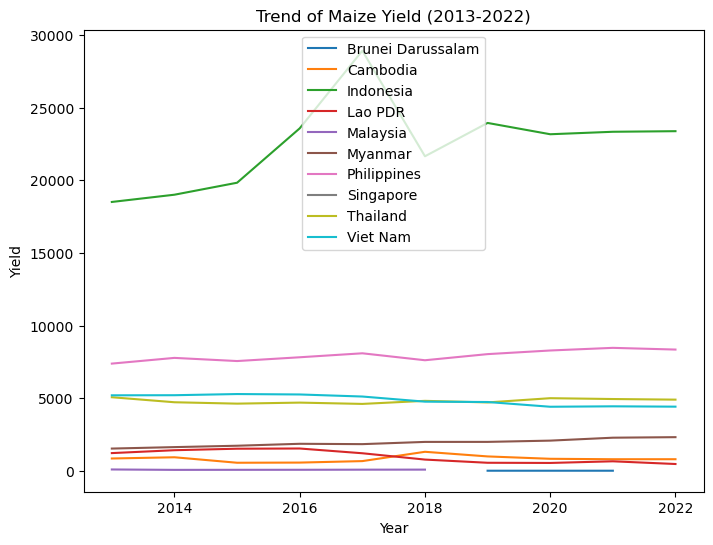

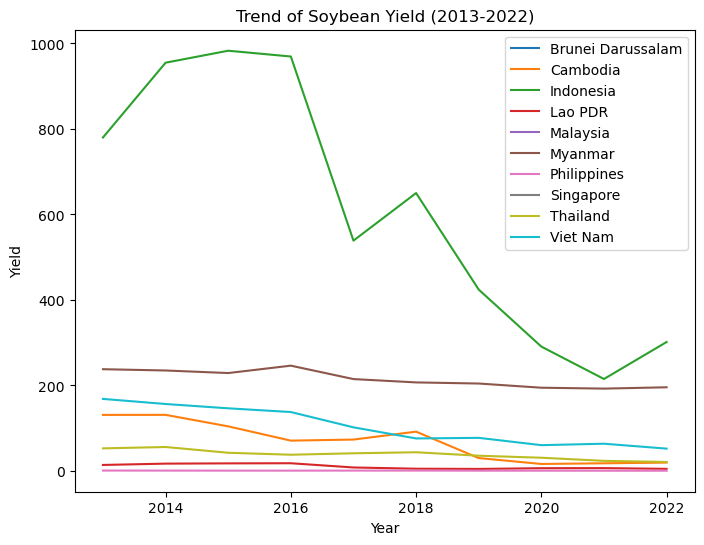

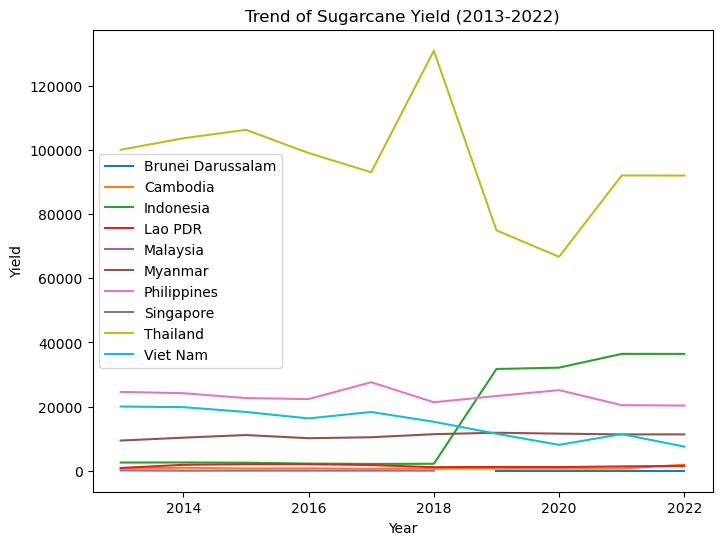

In [15]:
import matplotlib.pyplot as plt

# Filter data for each crop
for crop in ['paddy', 'cassava', 'maize', 'soybean', 'sugarcane']:
    crop_data = merged_df[merged_df['Crop'] == crop]
    plt.figure(figsize=(8,6))
    for country in crop_data['Country'].unique():
        country_data = crop_data[crop_data['Country'] == country]
        plt.plot(country_data['Year'], country_data['Yield'], label=country)
    plt.title(f"Trend of {crop.capitalize()} Yield (2013-2022)")
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.legend(loc='best')
    plt.show()

Observation:

From 2013 to 2022, the crop yields in ASEAN countries showed different trends depending on the type of crop and the country. For paddy, Indonesia had the highest yield overall, especially around 2018, but it dropped in the later years. Viet Nam and Thailand also had high paddy yields that stayed quite stable throughout.

Cassava yields were clearly led by Thailand, which stayed steady until a big increase in 2022. Cambodia’s cassava yield also grew steadily and even passed Viet Nam’s by the end. Other countries didn’t show much change and stayed low.

For maize, Indonesia showed a strong increase in yield until around 2018, then it went up and down a bit but still remained the highest. The Philippines had stable maize yields, while most other countries had low and flat lines, meaning not much change or production.

Soybean had a different pattern. Indonesia started high, but its yield dropped a lot after 2017. The rest of the countries had very low and almost flat yields, which suggests that soybean might not be a main crop for them.

In sugarcane, Thailand stood out with the highest yield. It had some ups and downs, especially a peak in 2018 and another rise in 2022. Indonesia’s sugarcane yield started increasing sharply around 2018, which was interesting. Other countries stayed in the middle or lower range.

Overall, it looks like Thailand and Indonesia are leading in crop yields, while others are either stable or low. These differences might be because of farming techniques, investment in agriculture, or natural conditions like soil and weather.










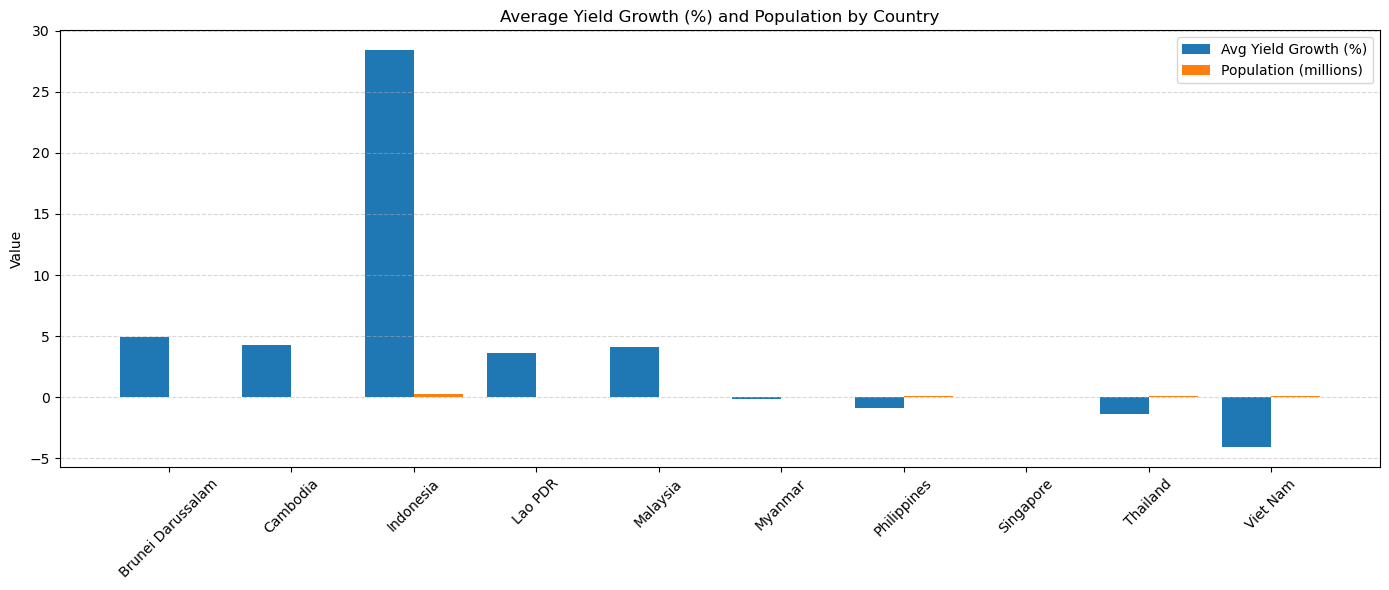

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate Yield Growth (%)
merged_df = merged_df.sort_values(by=['Country', 'Crop', 'Year'])
merged_df['Yield_Growth_%'] = merged_df.groupby(['Country', 'Crop'])['Yield'].pct_change(fill_method=None) * 100

# Step 2: Compute average Yield Growth (%) and latest Population
avg_growth = merged_df.groupby('Country')['Yield_Growth_%'].mean().reset_index()
latest_pop = merged_df[merged_df['Year'] == merged_df['Year'].max()].groupby('Country')['Population'].mean().reset_index()
pop_growth = pd.merge(avg_growth, latest_pop, on='Country')

# Optional: Scale population for better comparison (millions)
pop_growth['Population_Millions'] = pop_growth['Population'] / 1_000_000

# Step 3: Create grouped bar plot
x = np.arange(len(pop_growth['Country']))
width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, pop_growth['Yield_Growth_%'], width=width, label='Avg Yield Growth (%)')
plt.bar(x + width/2, pop_growth['Population_Millions'], width=width, label='Population (millions)')

plt.xticks(ticks=x, labels=pop_growth['Country'], rotation=45)
plt.title('Average Yield Growth (%) and Population by Country')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [17]:
merged_df

,Country,Crop,Year,Yield,Population,Yield_Growth_%
11,Brunei Darussalam,cassava,2013,3.0,406.2,NaN
66,Brunei Darussalam,cassava,2014,3.0,411.9,0.000000
121,Brunei Darussalam,cassava,2015,3.2,412.4,6.666667
176,Brunei Darussalam,cassava,2016,3.2,417.3,0.000000
231,Brunei Darussalam,cassava,2017,3.3,421.3,3.125000
...,...,...,...,...,...,...
328,Viet Nam,sugarcane,2018,15265.7,95385.2,-16.668304
383,Viet Nam,sugarcane,2019,11534.5,96484.0,-24.441722
438,Viet Nam,sugarcane,2020,8074.2,97582.7,-29.999567
493,Viet Nam,sugarcane,2021,11403.7,98506.2,41.236283


<Figure size 1200x600 with 0 Axes>

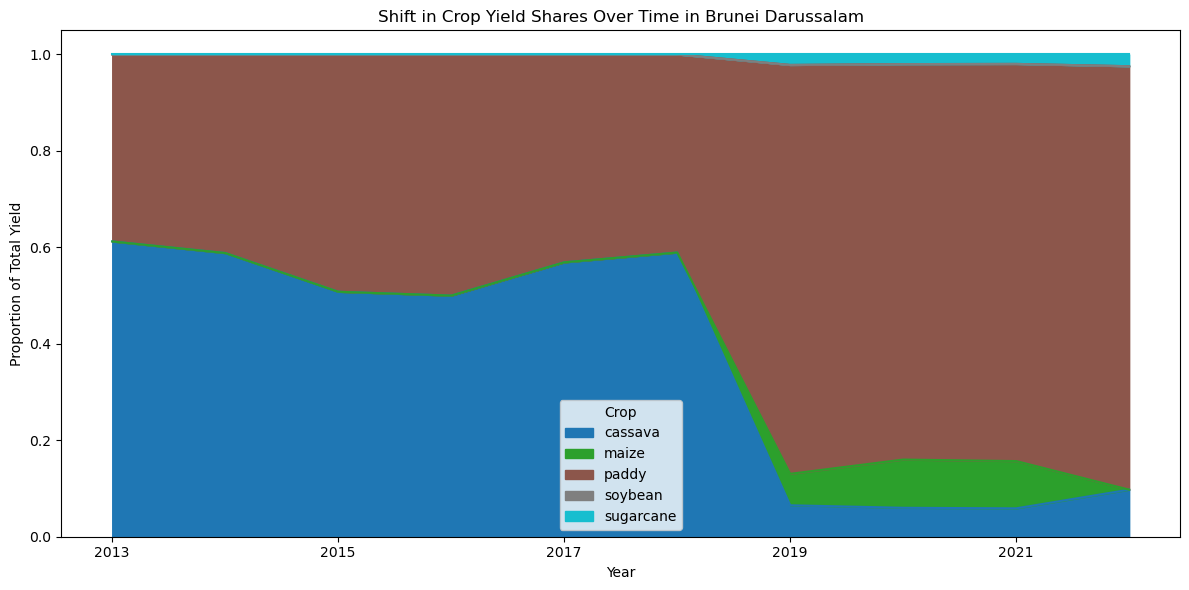

<Figure size 1200x600 with 0 Axes>

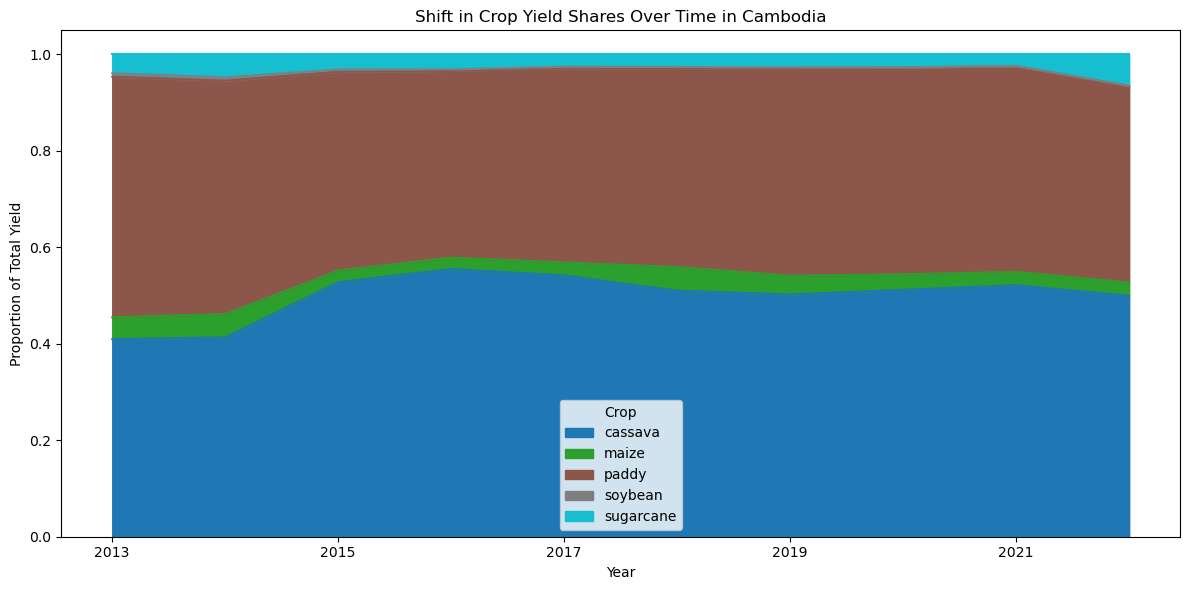

<Figure size 1200x600 with 0 Axes>

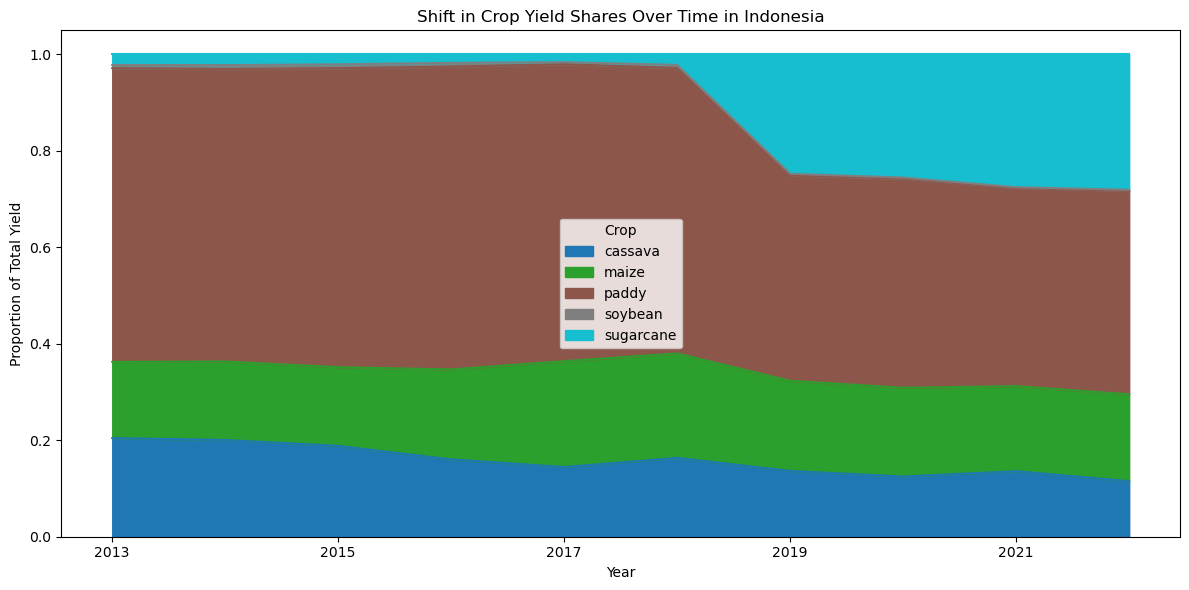

<Figure size 1200x600 with 0 Axes>

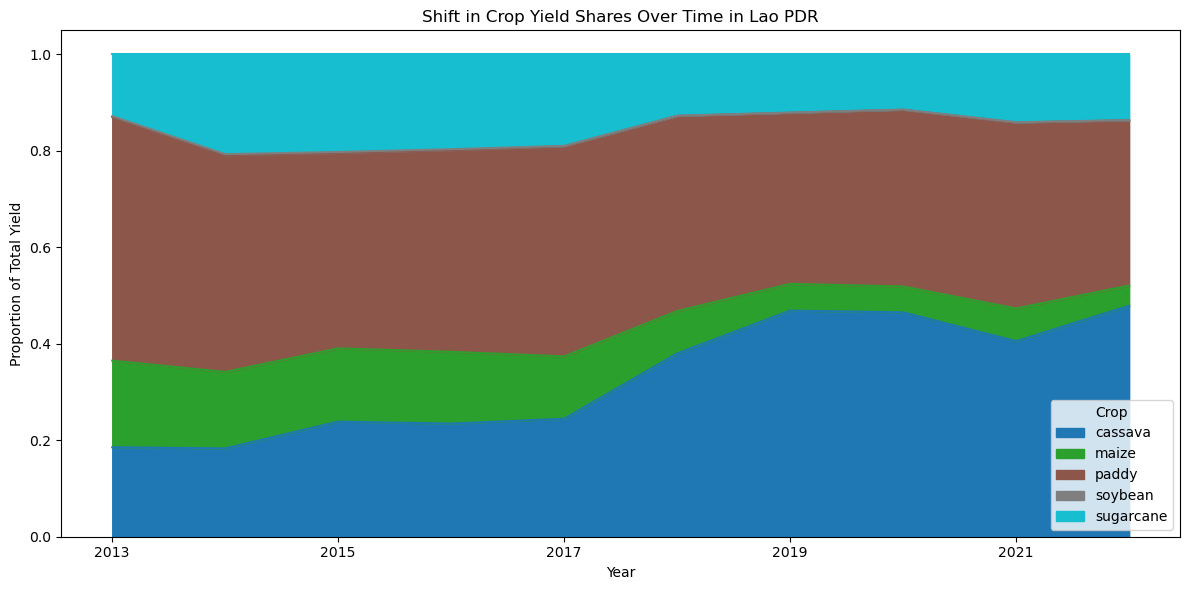

<Figure size 1200x600 with 0 Axes>

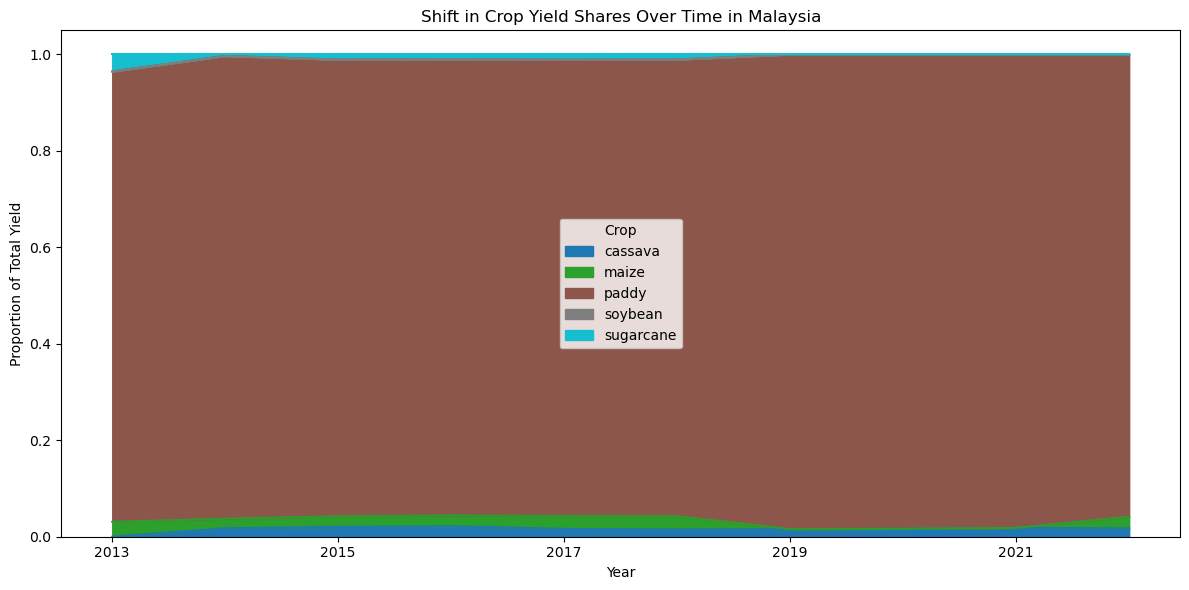

<Figure size 1200x600 with 0 Axes>

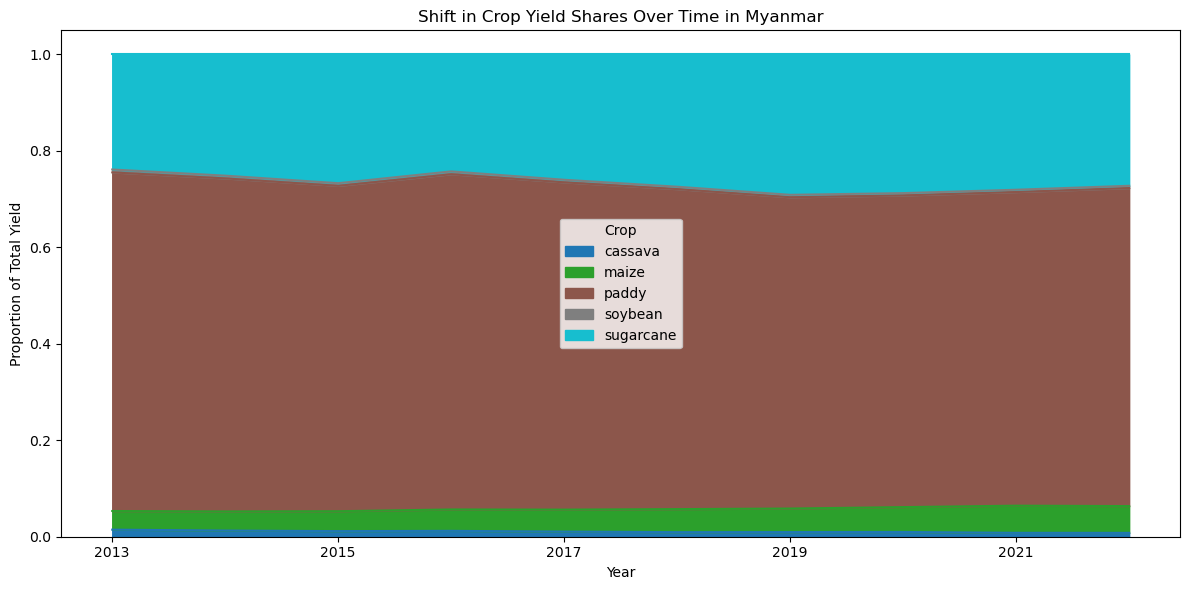

<Figure size 1200x600 with 0 Axes>

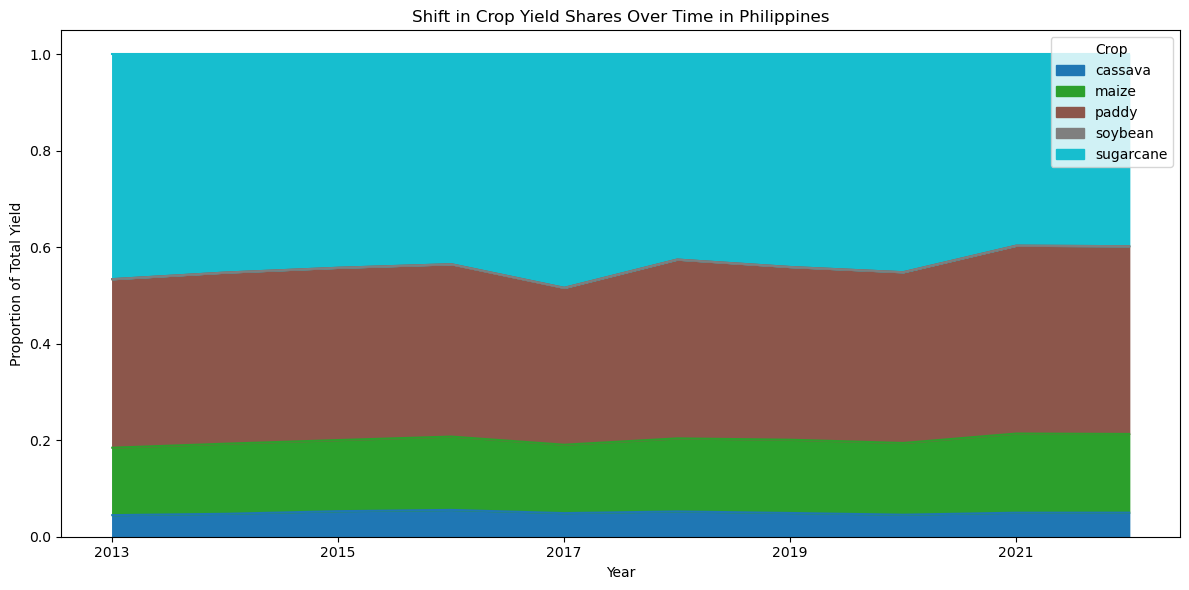

<Figure size 1200x600 with 0 Axes>

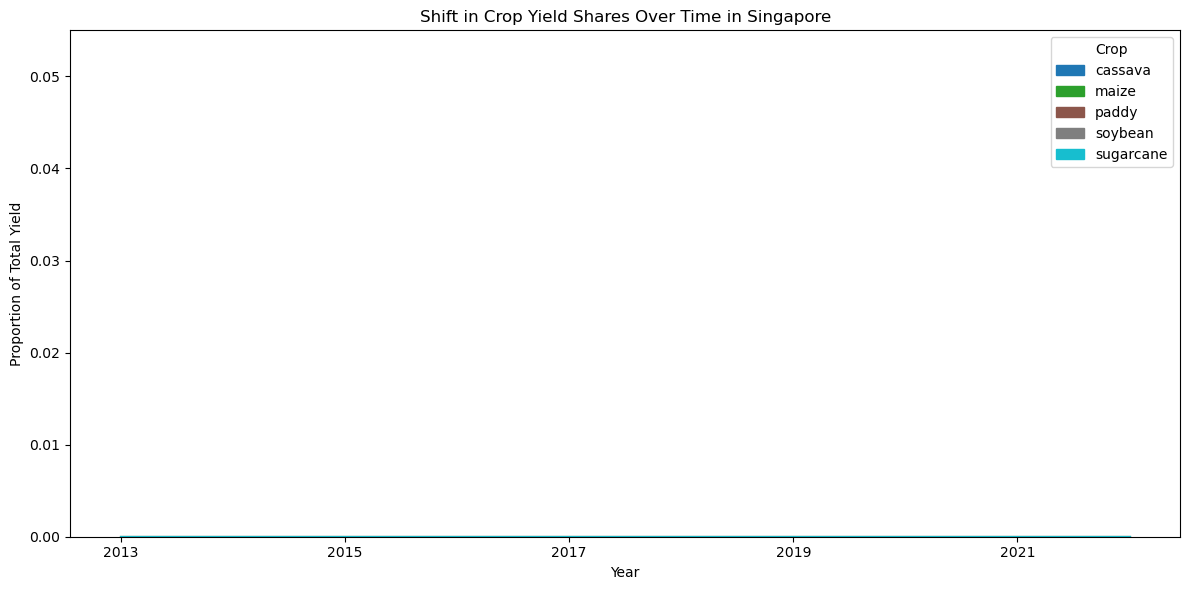

<Figure size 1200x600 with 0 Axes>

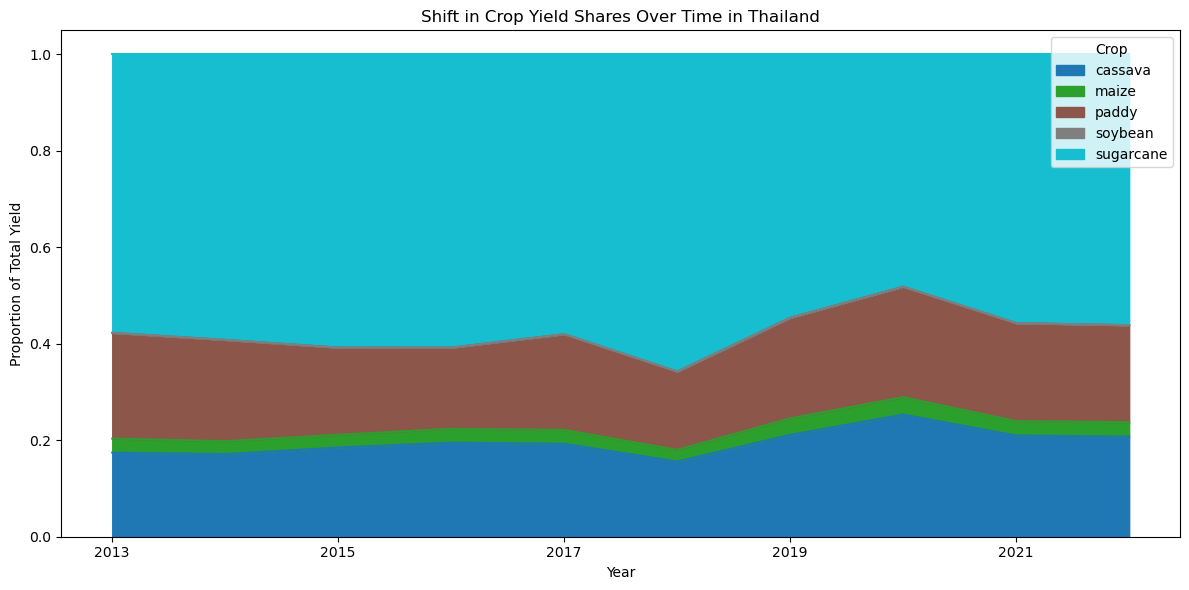

<Figure size 1200x600 with 0 Axes>

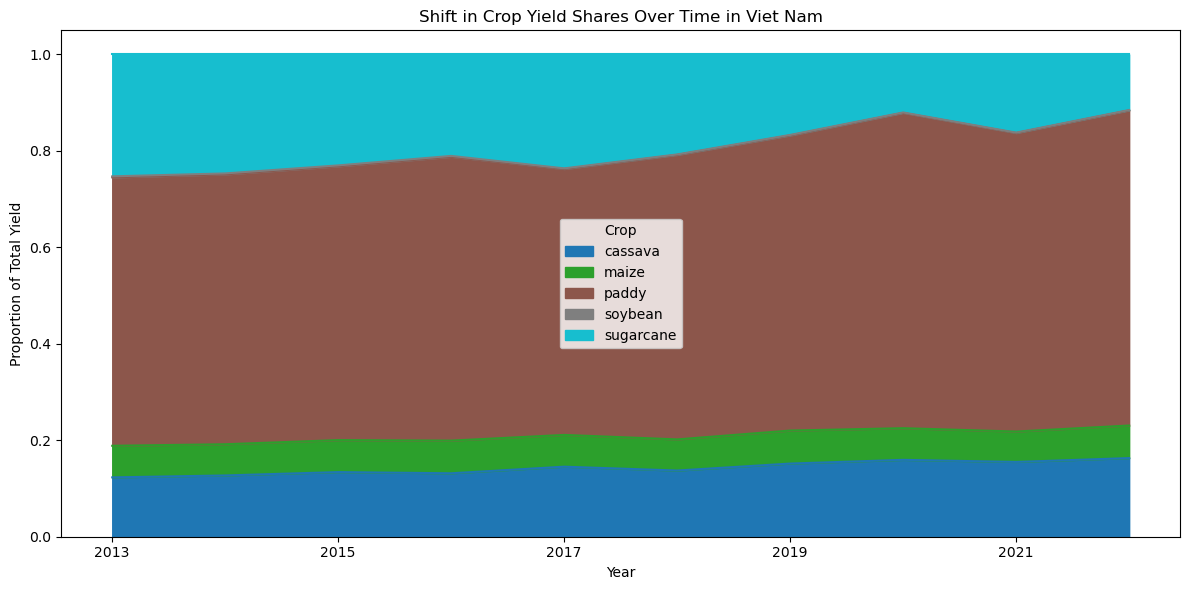

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data: total yield per country-year to normalize crop yield
merged_df['Year'] = merged_df['Year'].astype(str)  # ensure consistent plotting
total_yield = merged_df.groupby(['Country', 'Year'])['Yield'].sum().reset_index(name='Total_Yield')
merged_df = merged_df.merge(total_yield, on=['Country', 'Year'])
merged_df['Yield_Share'] = merged_df['Yield'] / merged_df['Total_Yield']

# Plot for each country
countries = merged_df['Country'].unique()

for country in countries:
    plt.figure(figsize=(12, 6))
    country_data = merged_df[merged_df['Country'] == country]
    pivot_df = country_data.pivot_table(index='Year', columns='Crop', values='Yield_Share', aggfunc='sum').fillna(0)
    pivot_df.plot(kind='area', stacked=True, colormap='tab10', figsize=(12, 6))
    plt.title(f'Shift in Crop Yield Shares Over Time in {country}')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Total Yield')
    plt.legend(title='Crop')
    plt.tight_layout()
    plt.show()


In [19]:
print(merged_df['Country'].unique())


['Brunei Darussalam' 'Cambodia' 'Indonesia' 'Lao PDR' 'Malaysia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Viet Nam']


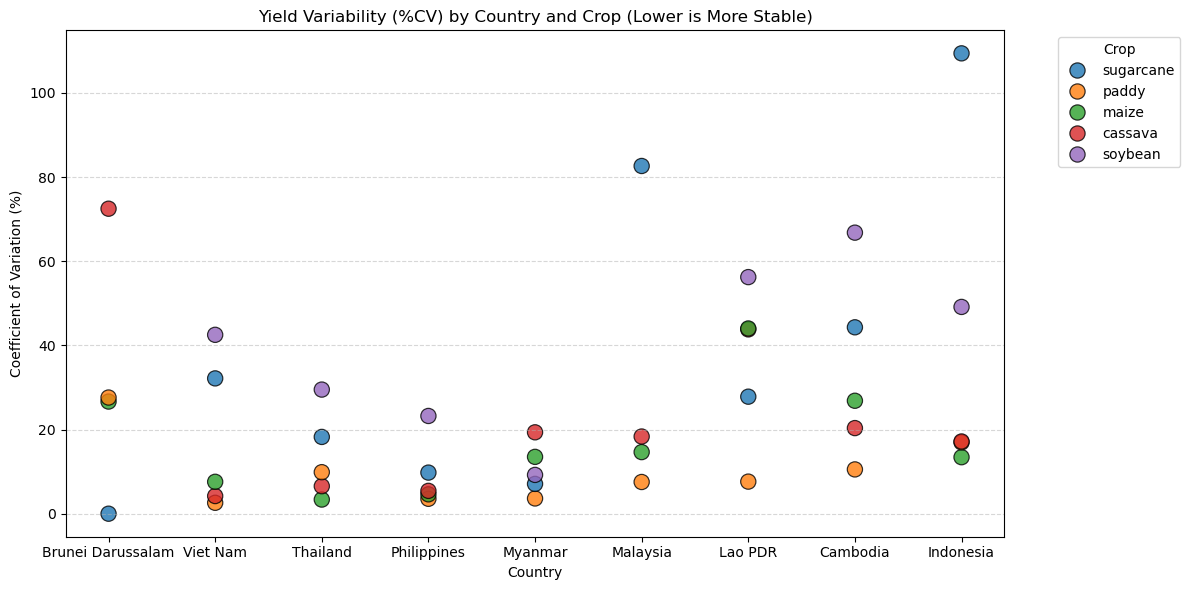

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Year to integer (if not already)
merged_df['Year'] = merged_df['Year'].astype(int)

# Calculate yield variability (standard deviation) as a proxy for yield stability
yield_stats = merged_df.groupby(['Country', 'Crop'])['Yield'].agg(['mean', 'std']).reset_index()
yield_stats['CV (%)'] = (yield_stats['std'] / yield_stats['mean']) * 100  # Coefficient of Variation

# Sort by stability (low CV = more stable)
yield_stats_sorted = yield_stats.sort_values('CV (%)')

# Plotting (scatter plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=yield_stats_sorted,
    x='Country',
    y='CV (%)',
    hue='Crop',
    s=120,  # size of the markers
    alpha=0.8,
    edgecolor='black'
)
plt.title('Yield Variability (%CV) by Country and Crop (Lower is More Stable)')
plt.ylabel('Coefficient of Variation (%)')
plt.xlabel('Country')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Observation:

Based on the bar chart showing Yield Variability (%CV) by Country and Crop, we can see that different countries have different levels of yield stability for various crops. For example, sugarcane appears to be the most unstable crop in Malaysia, Cambodia, and especially Indonesia, where it has the highest coefficient of variation (over 100%), meaning the yield fluctuates a lot from year to year. On the other hand, paddy (rice) tends to be more stable across most countries, especially in the Philippines and Viet Nam where the %CV is very low. Soybean also shows high variability in countries like Cambodia and Indonesia, which could make them more vulnerable to inconsistent supply. Interestingly, Singapore does not show any data, possibly because it doesn’t produce these crops.

This suggests that countries with high %CV for important crops may face food security risks due to unstable production, and they might benefit from adopting more sustainable and resilient farming practices.